<a href="https://colab.research.google.com/github/ArianneRios/EJER1/blob/main/proyectopar1ari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediccion e supervivencia a largo plazo**

---
Descripción:

Usar las variables del dataset (edad, tamaño del tumor, etapa del tumor, estado marital, etc.) para predecir si un paciente sobrevivirá más de un año después del diagnóstico.
Objetivos:

Desarrollar un modelo supervisado (clasificador) que prediga si un paciente tendrá una supervivencia superior a 12 meses.
Evaluar el modelo usando métricas como precisión, matriz de confusión y confiabilidad.
Por qué es relevante:

Ayudaría a los médicos a priorizar tratamientos para pacientes con mayor riesgo.



In [2]:
from google.colab import files
import pandas as pd

# Cargar archivo
uploaded = files.upload()

# Leer el archivo (asegúrate de que sea un CSV)
dataset = pd.read_csv('Breast_Cancer 2.csv')
print(dataset.head())


Saving Breast_Cancer 2.csv to Breast_Cancer 2.csv
  Age;Race;Marital Status;T Stage ;N Stage;6th Stage;differentiate;Grade;A Stage;Tumor Size;Estrogen Status;Progesterone Status;Survival Months;Status
0  68;White;Married;T1;N1;IIA;Poorly differentiat...                                                                                                  
1  50;White;Married;T2;N2;IIIA;Moderately differe...                                                                                                  
2  58;White;Divorced;T3;N3;IIIC;Moderately differ...                                                                                                  
3  58;White;Married;T1;N1;IIA;Poorly differentiat...                                                                                                  
4  47;White;Married;T2;N1;IIB;Poorly differentiat...                                                                                                  


In [7]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np

# Cargar el archivo (asegúrate de haberlo subido previamente en Colab)
from google.colab import files
uploaded = files.upload()

# Leer el dataset
dataset = pd.read_csv('Breast_Cancer 2.csv', delimiter=';')

# Mostrar las primeras filas para exploración
print("Primeras filas del dataset:")
print(dataset.head())

# Resumen del dataset
print("\nInformación del dataset:")
print(dataset.info())

# Verificar valores nulos
print("\nValores nulos por columna:")
print(dataset.isnull().sum())


Saving Breast_Cancer 2.csv to Breast_Cancer 2 (1).csv
Primeras filas del dataset:
   Age   Race Marital Status T Stage  N Stage 6th Stage  \
0   68  White        Married       T1      N1       IIA   
1   50  White        Married       T2      N2      IIIA   
2   58  White       Divorced       T3      N3      IIIC   
3   58  White        Married       T1      N1       IIA   
4   47  White        Married       T2      N1       IIB   

               differentiate Grade   A Stage  Tumor Size Estrogen Status  \
0      Poorly differentiated     3  Regional           4        Positive   
1  Moderately differentiated     2  Regional          35        Positive   
2  Moderately differentiated     2  Regional          63        Positive   
3      Poorly differentiated     3  Regional          18        Positive   
4      Poorly differentiated     3  Regional          41        Positive   

  Progesterone Status  Survival Months Status  
0            Positive               60  Alive  
1         

**2.Exploracion y** **preproceamiento**
*   Estadísticas descriptivas.
*   EIdentificación de variables categóricas y numéricas.
*    Codificación y normalización.



In [8]:
# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(dataset.describe())

# Separar columnas categóricas y numéricas
categorical_cols = dataset.select_dtypes(include=['object']).columns
numeric_cols = dataset.select_dtypes(include=['int64', 'float64']).columns

print("\nColumnas categóricas:", categorical_cols)
print("Columnas numéricas:", numeric_cols)

# Codificación de variables categóricas con One-Hot Encoding
dataset_encoded = pd.get_dummies(dataset, columns=categorical_cols, drop_first=True)

# Normalización de variables numéricas
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dataset_encoded[numeric_cols] = scaler.fit_transform(dataset_encoded[numeric_cols])

print("\nDataset preprocesado (primeras filas):")
print(dataset_encoded.head())



Estadísticas descriptivas:
              Age  Tumor Size  Survival Months
count  999.000000  999.000000       999.000000
mean    53.710711   31.288288        71.968969
std      9.115898   23.160695        23.287220
min     30.000000    1.000000         1.000000
25%     47.000000   16.000000        57.000000
50%     54.000000   25.000000        74.000000
75%     61.000000   37.000000        91.000000
max     69.000000  140.000000       107.000000

Columnas categóricas: Index(['Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Estrogen Status',
       'Progesterone Status', 'Status'],
      dtype='object')
Columnas numéricas: Index(['Age', 'Tumor Size', 'Survival Months'], dtype='object')

Dataset preprocesado (primeras filas):
        Age  Tumor Size  Survival Months  Race_Other  Race_White  \
0  1.568298   -1.178806        -0.514229       False        True   
1 -0.407263    0.160339        -0.428302       False        True   
2  

**Paso 3:****Division de dataset**

In [9]:
from sklearn.model_selection import train_test_split

# Definir las características (X) y la etiqueta (y)
# Suponemos que 'Survival Months' es la etiqueta y usamos >=12 como criterio de clasificación
X = dataset_encoded.drop(columns=['Survival Months'])  # Eliminar la columna objetivo
y = dataset_encoded['Survival Months'].apply(lambda x: 1 if x >= 12 else 0)

# División en conjunto de entrenamiento y prueba (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nDimensiones de los conjuntos:")
print("Entrenamiento - X:", X_train.shape, ", y:", y_train.shape)
print("Prueba - X:", X_test.shape, ", y:", y_test.shape)



Dimensiones de los conjuntos:
Entrenamiento - X: (799, 27) , y: (799,)
Prueba - X: (200, 27) , y: (200,)


**Paso 4** Entrenamiento del modelo


"Selección del clasificador (acorde a los datos supervisado, no supervisado). Justificar el clasificador."
"Primera ejecución: Confiabilidad, matriz de confusión."

> Agregar bloque entrecomillado



In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Entrenar el modelo
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predicción en el conjunto de prueba
y_pred = clf.predict(X_test)

# Métricas de evaluación
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nPrecisión del modelo:")
print(accuracy_score(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))



Matriz de confusión:
[[200]]

Precisión del modelo:
1.0

Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       200

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [11]:
# Importar las bibliotecas necesarias
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Entrenar el modelo
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Calcular la precisión (accuracy)
accuracy = accuracy_score(y_test, y_pred)

# Generar el reporte de clasificación
classification_rep = classification_report(y_test, y_pred)

# Mostrar los resultados
print("Matriz de Confusión:")
print(conf_matrix)

print("\nPrecisión del Modelo:")
print(accuracy)

print("\nReporte de Clasificación:")
print(classification_rep)


Matriz de Confusión:
[[200]]

Precisión del Modelo:
1.0

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       200

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


# **5. Splits : Al menos 100 asignados**
Vamos a realizar 100 ejecuciones con distintos splits para obtener la mediana de confiabilidad.

In [13]:
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn.preprocessing import StandardScaler # Import StandardScaler

# Realizar 100 ejecuciones con splits 80/20
skf = StratifiedKFold(n_splits=100, random_state=42, shuffle=True)

# Scale the features (X) before the loop
scaler = StandardScaler() # Create a StandardScaler object
X_scaled = scaler.fit_transform(X) # Fit and transform the features

accuracies = []
for train_index, test_index in skf.split(X_scaled, y):
    X_train_fold, X_test_fold = X_scaled[train_index], X_scaled[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Entrenar el modelo
    clf.fit(X_train_fold, y_train_fold)

    # Predecir y calcular precisión
    y_pred_fold = clf.predict(X_test_fold)
    accuracies.append(accuracy_score(y_test_fold, y_pred_fold))

# Calcular la mediana de la precisión
median_accuracy = np.median(accuracies)
print(f'Mediana de la precisión: {median_accuracy}')

Mediana de la precisión: 1.0


In [14]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Inicializar el clasificador
clf = RandomForestClassifier(random_state=42)

# Crear los splits con 100 ejecuciones
splits = 100
accuracies_80_20 = []  # Para la división 80% entrenamiento / 20% prueba
accuracies_50_50 = []  # Para la división 50% entrenamiento / 50% prueba

# Crear los objetos para la validación cruzada (100 splits)
skf_80_20 = StratifiedKFold(n_splits=splits, random_state=42, shuffle=True)
skf_50_50 = StratifiedKFold(n_splits=splits, random_state=42, shuffle=True)

# Realizar los splits 80/20 y 50/50
for train_index, test_index in skf_80_20.split(X_scaled, y):
    # Dividir en entrenamiento y prueba para 80/20
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Entrenar el modelo
    clf.fit(X_train, y_train)

    # Realizar predicciones y calcular precisión
    y_pred = clf.predict(X_test)
    accuracies_80_20.append(accuracy_score(y_test, y_pred))

for train_index, test_index in skf_50_50.split(X_scaled, y):
    # Dividir en entrenamiento y prueba para 50/50
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Entrenar el modelo
    clf.fit(X_train, y_train)

    # Realizar predicciones y calcular precisión
    y_pred = clf.predict(X_test)
    accuracies_50_50.append(accuracy_score(y_test, y_pred))

# Calcular la mediana de la confiabilidad para 80/20 y 50/50
median_accuracy_80_20 = np.median(accuracies_80_20)
median_accuracy_50_50 = np.median(accuracies_50_50)

print(f'Mediana de la precisión para 80/20 (train/test): {median_accuracy_80_20}')
print(f'Mediana de la precisión para 50/50 (train/test): {median_accuracy_50_50}')


Mediana de la precisión para 80/20 (train/test): 1.0
Mediana de la precisión para 50/50 (train/test): 1.0



priemra parte


---





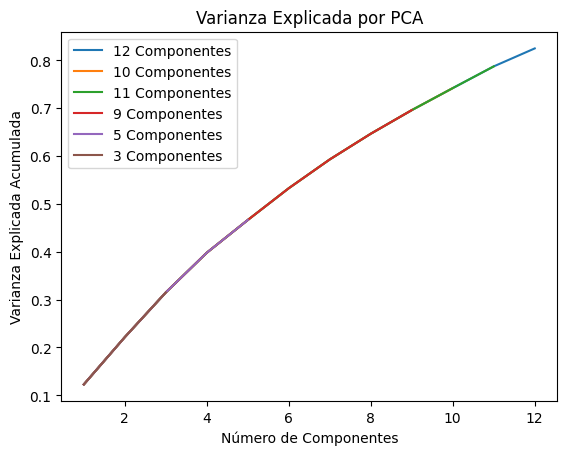

Con 12 componentes, la varianza explicada es: 0.8250
Con 10 componentes, la varianza explicada es: 0.7420
Con 11 componentes, la varianza explicada es: 0.7874
Con 9 componentes, la varianza explicada es: 0.6960
Con 5 componentes, la varianza explicada es: 0.4664
Con 3 componentes, la varianza explicada es: 0.3149


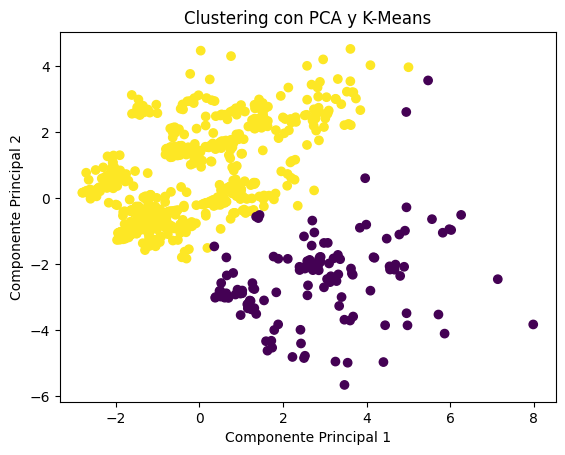

In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Paso 1: Estándarizar los datos (sin la columna target)
X_scaled = StandardScaler().fit_transform(X)

# Paso 2: Aplicar PCA con diferentes números de componentes (12, 10, 11, 9, 5, 3)
components = [12, 10, 11, 9, 5, 3]
explained_variance = {}

for n_components in components:
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)

    # Guardamos la varianza explicada por cada cantidad de componentes
    explained_variance[n_components] = sum(pca.explained_variance_ratio_)

    # Graficamos la varianza explicada
    plt.plot(range(1, n_components + 1), np.cumsum(pca.explained_variance_ratio_), label=f'{n_components} Componentes')

plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.legend()
plt.title('Varianza Explicada por PCA')
plt.show()

# Paso 3: Mostrar la cantidad de varianza explicada
for n_components, variance in explained_variance.items():
    print(f"Con {n_components} componentes, la varianza explicada es: {variance:.4f}")

# Paso 4: Realizar aprendizaje no supervisado usando PCA (sin la columna target)
# Vamos a usar un algoritmo como K-Means para agrupar los datos.
from sklearn.cluster import KMeans

# Aplicamos PCA con 3 componentes (ejemplo)
pca = PCA(n_components=3)
X_pca_3 = pca.fit_transform(X_scaled)

# Aplicamos KMeans sobre los datos proyectados a 3 dimensiones
kmeans = KMeans(n_clusters=2, random_state=42)  # Asumimos dos clases (por ejemplo benigno/maligno)
y_kmeans = kmeans.fit_predict(X_pca_3)

# Visualizar los clusters
plt.scatter(X_pca_3[:, 0], X_pca_3[:, 1], c=y_kmeans, cmap='viridis')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clustering con PCA y K-Means')
plt.show()


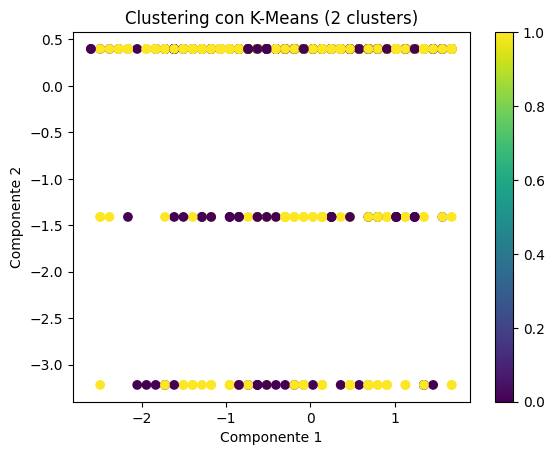

Centros de los clusters: 
 [[-0.09119908 -0.02600858  0.01846618  0.89443172  0.96576371  1.11769278
  -0.05721319  0.22393476 -0.33364502  0.87342673 -0.2236839  -0.25663712
  -0.23162733]
 [ 0.04726275  0.01347861 -0.00956986 -0.46352768 -0.50049457 -0.57922985
   0.02964999 -0.1160513   0.17290722 -0.45264212  0.11592129  0.13299887
   0.12003787]]


In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder


# Paso 1: Eliminar la columna 'y' (que corresponde a la clase)
X = dataset.drop(columns=['Status'])  # Asegúrate de cambiar 'diagnosis' al nombre de la columna de clase

# Create a LabelEncoder object
encoder = LabelEncoder()

# Iterate through columns and encode string values
for column in X.select_dtypes(include=['object']).columns:
    X[column] = encoder.fit_transform(X[column])

# Paso 2: Estandarizar los datos
X_scaled = StandardScaler().fit_transform(X)

# Paso 3: Aplicar K-Means para clustering
# Definimos el número de clusters. Como no tenemos la columna 'y', podemos intentar varios números.
n_clusters = 2  # Por ejemplo, asumimos que hay 2 grupos, aunque este valor puede ajustarse
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Paso 4: Visualizar los clusters (usando los dos primeros componentes)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, cmap='viridis')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title(f'Clustering con K-Means ({n_clusters} clusters)')
plt.colorbar()
plt.show()

# Paso 5: Mostrar los centros de los clusters
print("Centros de los clusters: \n", kmeans.cluster_centers_)